<a href="https://colab.research.google.com/github/IsraelPanazollo/Problema_de_Regressao/blob/main/Aplicacao_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>APLICAÇÃO DE REGRESSÃO</font>
***

# Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

## Verificação das versões

In [2]:
print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do seaborn -> %s' % sns.__version__)
print('Versão do sklearn -> %s' % sklearn.__version__)

Versão do pandas -> 2.0.3
Versão do numpy -> 1.25.2
Versão do seaborn -> 0.13.1
Versão do sklearn -> 1.2.2


# Explorando os dados

Prever o preço dos imovéis é um grande desafio, mas utilizando o aprendizado de máquina é possível obter modelos que realizam essas previsões com valores consistentes com a realidade.

## Carregar os dados

Inicia-se a análise dos dados, carregando estes de um arquivo json, que contém as informações dos imóveis de uma certa região do Rio de Janeiro.

In [3]:
dados = pd.read_json(path_or_buf = '/content/imoveis.json', orient = 'columns')

In [4]:
dados.head()

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."


## Analisar informações

É possível notar que os dados obtidos do arquivo json, encontram-se em um formato que precisa ser tratado para que a visualização dos dados ocorre de forma mais simples.

In [5]:
dados.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [6]:
dados.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

## Elaboração de novo dataframe

Com esses dados json, obtém-se um novo dataframe com as informações dos imóveis de uma maneira visualmente mais agradável de modo que os dados de cada campo ficam em uma só coluna.

In [7]:
dados_ident = pd.json_normalize(dados.ident)

In [8]:
dados_ident.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [9]:
dados_listing = pd.json_normalize(dados.listing, sep='_')

In [10]:
dados_listing.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


In [11]:
dados_imoveis = pd.concat([dados_ident, dados_listing], axis = 1)

In [12]:
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


## Extraindo informações básicas

Uma vez que tem-se um novo dataframe, extrai-se as principais informações como o número de registros e campos, o tipo de dados que estão armazenados e nota-se a existência de campos não preenchidos (com NA).

In [13]:
dados_imoveis.shape

(73615, 21)

In [14]:
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73615 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                73615 non-null  object 
 1   source                    73615 non-null  object 
 2   types_unit                73615 non-null  object 
 3   types_usage               73615 non-null  object 
 4   address_city              73615 non-null  object 
 5   address_location_lon      73468 non-null  float64
 6   address_location_lat      73468 non-null  float64
 7   address_zone              73615 non-null  object 
 8   address_neighborhood      73615 non-null  object 
 9   prices_price              73615 non-null  object 
 10  prices_tax_iptu           64499 non-null  object 
 11  prices_tax_condo          67111 non-null  object 
 12  features_bedrooms         73615 non-null  int64  
 13  features_bathrooms        73615 non-null  int64  
 14  featur

## Seleção de dados para análise

Diante do volume de dados, pretende-se realizar um estudo para prever os valores dos imóveis. Porém, faremos um recorte, selecionando apenas os imóveis do setor comercial e do Rio de Janeiro. A finalidade é ter previsões mais específicas sobre um setor em uma área.

In [15]:
dados_imoveis['address_city'].unique()

array(['Rio de Janeiro', 'Cachoeirinha', 'Queimados',
       'São João de Meriti', 'São Gonçalo', 'Armação dos Búzios'],
      dtype=object)

In [16]:
dados_imoveis['types_usage'].value_counts()

types_usage
Residencial    69596
Comercial       4019
Name: count, dtype: int64

In [17]:
filtro = (dados_imoveis['types_usage'] == 'Comercial') & (dados_imoveis['address_city'] ==  'Rio de Janeiro')
dados_comercial_RJ = dados_imoveis[filtro]

In [18]:
dados_comercial_RJ.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
6,593569-CJLMNFGW,Website,Outros,Comercial,Rio de Janeiro,-43.345300,-22.939028,Zona Oeste,Freguesia (Jacarepaguá),50000,...,801,0,1,0,0,25,25,0,0,2
7,989181-RYJOLMCU,Website,Outros,Comercial,Rio de Janeiro,-43.278855,-22.841509,Zona Norte,Penha,50000,...,230,0,1,0,0,23,23,0,0,0
8,145372-EZKAKSWM,Website,Outros,Comercial,Rio de Janeiro,-43.392253,-22.835609,Zona Norte,Ricardo de Albuquerque,45000,...,None,0,0,0,0,60,60,0,0,0
15,041590-HMJIRKDX,Website,Outros,Comercial,Rio de Janeiro,-43.177970,-22.910099,Zona Central,Centro,45000,...,0,0,0,0,1,5,5,0,0,0


In [19]:
dados_comercial_RJ.reset_index(drop=True, inplace=True)

In [20]:
dados_comercial_RJ.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4019 entries, 0 to 4018
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 659.5+ KB


## Tratamento dos dados selecionados

Agora que os dados foram selecionados, serão realizadas alguns tratamentos para a modelagem. Primeiramente, modifica-se alguns tipos de dados com o formato "object" para valores númericos

In [21]:
dados_comercial_RJ = dados_comercial_RJ.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64',
})

A presença de valores nulos é problemática e precisa ser solucionada.

In [22]:
dados_comercial_RJ.isnull().sum()

customerID                    0
source                        0
types_unit                    0
types_usage                   0
address_city                  0
address_location_lon          8
address_location_lat          8
address_zone                  0
address_neighborhood          0
prices_price                  0
prices_tax_iptu             390
prices_tax_condo            443
features_bedrooms             0
features_bathrooms            0
features_suites               0
features_parkingSpaces        0
features_usableAreas          0
features_totalAreas           0
features_floors               0
features_unitsOnTheFloor      0
features_unitFloor            0
dtype: int64

Para esses registros onde a taxa de IPTU e de condomínio não está presente, serão preenchidos com zero.

In [23]:
dados_comercial_RJ['prices_tax_iptu'].fillna(0, inplace = True)
dados_comercial_RJ['prices_tax_condo'].fillna(0, inplace = True)

Para os registros que a localização se encontra ausente, será necessário preencher com os valores apropriados. Para tanto, utiliza-se a informação do bairro, para preencher a zona, bem como a latitude e longitude com o valor médio deste bairro.

In [24]:
registros_com_na = dados_comercial_RJ[dados_comercial_RJ['address_location_lat'].isna()]
registros_com_na

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
501,043172-NNEZWOSZ,Website,Outros,Comercial,Rio de Janeiro,NaN,NaN,,Estácio,144999.0,...,870.0,0,1,0,1,28,28,0,0,0
795,641171-NSZNFNSE,Website,Outros,Comercial,Rio de Janeiro,NaN,NaN,,Estácio,179999.0,...,870.0,0,1,0,1,28,28,0,0,0
1592,299106-RBPOPASR,Website,Outros,Comercial,Rio de Janeiro,NaN,NaN,,Centro,289999.0,...,1200.0,0,2,0,0,90,90,0,0,0
1815,022887-KDVWSGWQ,Website,Outros,Comercial,Rio de Janeiro,NaN,NaN,,Tijuca,314999.0,...,1900.0,0,1,0,1,45,45,0,0,0
2385,859222-SQZCOKHS,Website,Outros,Comercial,Rio de Janeiro,NaN,NaN,,Tijuca,464999.0,...,2100.0,0,1,0,1,35,35,0,0,0
2386,529676-EDGWBMGQ,Website,Outros,Comercial,Rio de Janeiro,NaN,NaN,,Tijuca,464999.0,...,2100.0,0,1,0,1,31,31,0,0,0
2387,355224-EAZBEEYB,Website,Outros,Comercial,Rio de Janeiro,NaN,NaN,,Tijuca,464999.0,...,2100.0,0,1,0,1,31,31,0,0,0
3961,056832-QNNEAUMQ,Website,Outros,Comercial,Rio de Janeiro,NaN,NaN,,Rio Comprido,5599999.0,...,0.0,0,10,0,10,1537,1537,0,0,0


In [25]:
bairros_com_na = dados_comercial_RJ[dados_comercial_RJ['address_location_lat'].isna()]['address_neighborhood'].unique()
bairros_com_na

array(['Estácio', 'Centro', 'Tijuca', 'Rio Comprido'], dtype=object)

In [26]:
dados_por_bairro_com_na = {}
for bairro in bairros_com_na:
  df = dados_comercial_RJ.query(f'address_neighborhood == "{bairro}"')
  latitudes = df['address_location_lat'].mean()
  longitudes = df['address_location_lon'].mean()
  zona = df['address_zone'].iloc[0]
  dados_por_bairro_com_na[bairro] = {'latitude': latitudes, 'longitude': longitudes, 'zona': zona}

print(dados_por_bairro_com_na)

{'Estácio': {'latitude': -22.9150463, 'longitude': -43.2066353, 'zona': 'Zona Central'}, 'Centro': {'latitude': -22.906169151620368, 'longitude': -43.17863488773148, 'zona': 'Zona Central'}, 'Tijuca': {'latitude': -22.923776767326736, 'longitude': -43.22996091584159, 'zona': 'Zona Norte'}, 'Rio Comprido': {'latitude': -22.921931083333337, 'longitude': -43.20997716666667, 'zona': 'Zona Norte'}}


In [27]:
for bairro in bairros_com_na:
  indices = dados_comercial_RJ.loc[dados_comercial_RJ['address_neighborhood'] == bairro].index
  dados_comercial_RJ.loc[indices, 'address_location_lat'] = dados_por_bairro_com_na[bairro]['latitude']
  dados_comercial_RJ.loc[indices, 'address_location_lon'] = dados_por_bairro_com_na[bairro]['longitude']
  dados_comercial_RJ.loc[indices, 'address_zone'] = dados_por_bairro_com_na[bairro]['zona']

In [28]:
dados_imoveis.loc[registros_com_na.index]

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
501,536738-LVWUBWXJ,Website,Outros,Comercial,Rio de Janeiro,-43.178189,-22.899180,Zona Central,Centro,100000,...,552,0,0,0,0,26,26,0,0,0
795,547540-BECGAOFO,Website,Apartamento,Residencial,Rio de Janeiro,-43.299352,-22.876863,Zona Norte,Pilares,120000,...,200,2,1,0,0,65,65,0,0,0
1592,057146-CVKXPHQO,Website,Casa,Residencial,Rio de Janeiro,-43.613054,-22.877297,Zona Oeste,Campo Grande,150000,...,238,2,1,0,1,53,34708,0,0,0
1815,657679-SXTNUAIR,Website,Apartamento,Residencial,Rio de Janeiro,-43.569477,-22.905085,Zona Oeste,Campo Grande,160000,...,200,2,1,0,1,75,75,0,0,0
2385,763957-PXOHPPXZ,Website,Apartamento,Residencial,Rio de Janeiro,-43.275942,-22.839281,Zona Norte,Penha,170000,...,330,1,1,0,1,50,50,0,0,0
2386,439784-UOHPDUBR,Website,Apartamento,Residencial,Rio de Janeiro,-43.255063,-22.861468,Zona Norte,Ramos,169000,...,250,2,1,0,1,44,6000,0,0,0
2387,324652-QKVUMGJL,Website,Apartamento,Residencial,Rio de Janeiro,-43.328619,-22.974463,Zona Oeste,Itanhangá,170000,...,700,2,1,0,1,60,60,0,0,7
3961,215727-ANOZDXNM,Website,Apartamento,Residencial,Rio de Janeiro,-43.389729,-22.924537,Zona Oeste,Taquara,190000,...,430,2,1,0,1,53,53,6,10,5


Por fim, verifica-se se existe algum valor NA e é confirmado que não há

In [29]:
dados_comercial_RJ.isna().sum().sum()

0

Para as análises, não é relevante saber qual é o ID do cliente, a fonte de onde se obteve o dado, o tipo de uso (já que todos são comerciais), nem a cidade (já que todos são do Rio de Janeiro).

In [30]:
dados_comercial_RJ.drop(['customerID', 'source', 'types_usage', 'address_city'], axis = 1, inplace=True)

Diante das informações presentes, remove-se os dados de latitude, longitude e bairro, resumindo os seus efeitos na zona onde o imóvel se encontra.

In [31]:
dados_comercial_RJ.drop(['address_location_lon', 'address_location_lat','address_neighborhood' ], axis = 1, inplace=True)

Outra modificação que pode ser realizada é a renomeação das colunas, visando a facilidade de escrita e leitura.

In [32]:
dicionario_colunas = {'types_unit': 'tipo', 'address_zone': 'zona', 'prices_price': 'preco',
                     'prices_tax_condo': 'tax_condo', 'prices_tax_iptu': 'tax_iptu', 'features_bedrooms': 'quartos',
                      'features_bathrooms': 'banheiros', 'features_suites': 'suites', 'features_parkingSpaces': 'garagens',
                      'features_usableAreas': 'area_usavel', 'features_totalAreas':'area_total', 'features_floors':'pisos',
                      'features_unitsOnTheFloor':'unidades_sobre_piso', 'features_unitFloor':'unidades_piso'}

dados_comercial_RJ = dados_comercial_RJ.rename(dicionario_colunas, axis = 1)

In [33]:
dados_comercial_RJ.head()

,tipo,zona,preco,tax_iptu,tax_condo,quartos,banheiros,suites,garagens,area_usavel,area_total,pisos,unidades_sobre_piso,unidades_piso
0,Outros,Zona Norte,45000.0,346.0,468.0,0,1,0,0,32,32,0,0,3
1,Outros,Zona Oeste,50000.0,211.0,801.0,0,1,0,0,25,25,0,0,2
2,Outros,Zona Norte,50000.0,0.0,230.0,0,1,0,0,23,23,0,0,0
3,Outros,Zona Norte,45000.0,0.0,0.0,0,0,0,0,60,60,0,0,0
4,Outros,Zona Central,45000.0,0.0,0.0,0,0,0,1,5,5,0,0,0


Pode-se apresentar as estatísticas básicas dos preços, para termos uma noção de como os valores se apresentam. Daqui destacam-se os valores máximos e mínimos, a média e o desvio padrão.

In [34]:
dados_comercial_RJ["preco"].describe().round(2)

count        4019.00
mean       808606.54
std       1205383.81
min         45000.00
25%        200000.00
50%        360000.00
75%        800000.00
max      10000000.00
Name: preco, dtype: float64

# Regressão

Com os dados selecionados e tratados, passa-se para uma análise destes para aplicação nos modelos.

## Correlação

A correlação é uma das informações relevantes para o estudo de como uma variável explica outras. Porém, a visualização no formato tabular não é muito agradável. Sendo assim, será desenvolvido uma visualização como mapa de calor para ver os efeitos das variáveis umas sobre as outras. Cabe destacar que a correlação não implica em causalidade, contudo é essencial verificar como as variáveis se relacionam entre si, mesmo que não de modo causal.

In [35]:
correlacao = dados_comercial_RJ.drop(['tipo','zona'], axis=1).corr()
correlacao

,preco,tax_iptu,tax_condo,quartos,banheiros,suites,garagens,area_usavel,area_total,pisos,unidades_sobre_piso,unidades_piso
preco,1.000000,0.009247,0.007741,0.287373,0.433799,0.165492,0.213319,0.659812,0.053115,-0.059028,-0.100824,-0.070631
tax_iptu,0.009247,1.000000,0.014470,-0.002897,-0.002337,-0.000919,-0.003698,0.066264,0.004794,0.003790,-0.003953,-0.003235
tax_condo,0.007741,0.014470,1.000000,-0.009143,0.004643,-0.004026,0.003099,0.004828,-0.001089,-0.006802,-0.009941,0.053959
quartos,0.287373,-0.002897,-0.009143,1.000000,0.663306,0.551751,0.042642,0.262943,0.022049,-0.020656,-0.016905,-0.019578
banheiros,0.433799,-0.002337,0.004643,0.663306,1.000000,0.538937,0.134606,0.387086,0.033019,0.007234,-0.013818,0.007069
suites,0.165492,-0.000919,-0.004026,0.551751,0.538937,1.000000,0.026218,0.107851,0.010767,-0.006586,0.028677,-0.005824
garagens,0.213319,-0.003698,0.003099,0.042642,0.134606,0.026218,1.000000,0.245461,0.024946,-0.009471,-0.012376,-0.028869
area_usavel,0.659812,0.066264,0.004828,0.262943,0.387086,0.107851,0.245461,1.000000,0.070490,-0.069128,-0.108735,-0.079691
area_total,0.053115,0.004794,-0.001089,0.022049,0.033019,0.010767,0.024946,0.070490,1.000000,-0.019747,-0.021093,-0.022613
pisos,-0.059028,0.003790,-0.006802,-0.020656,0.007234,-0.006586,-0.009471,-0.069128,-0.019747,1.000000,0.494259,0.514099


Daqui já é possível notar a correlação dos preços mais forte com o número de quartos, banheiros, garagens, mas especialmente na área usável.

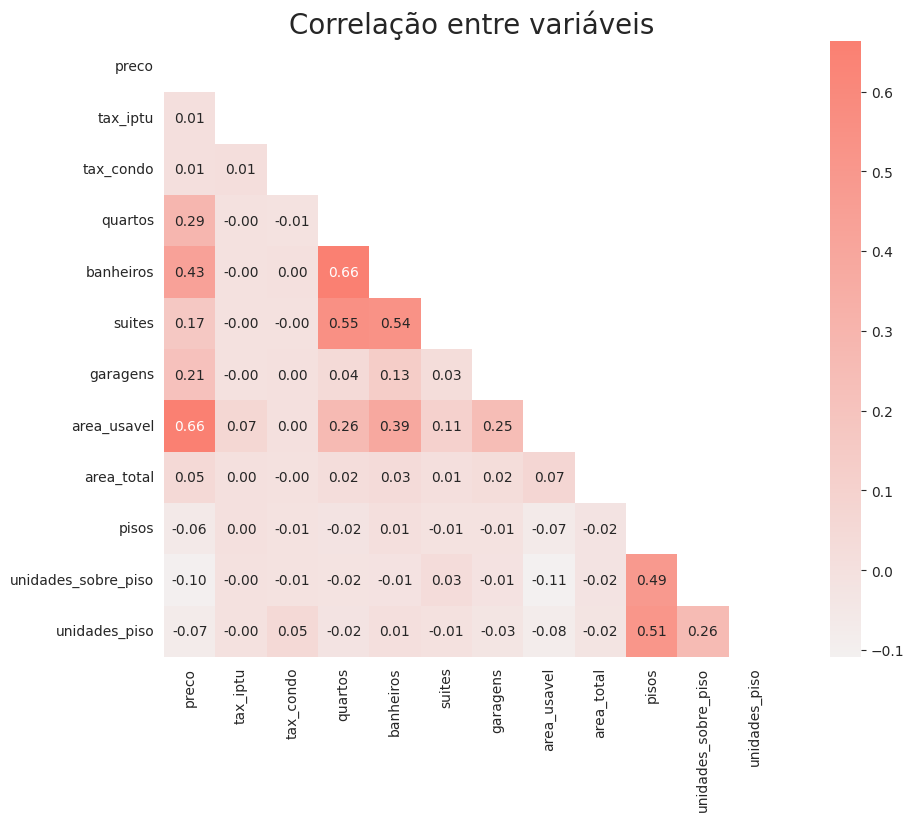

In [36]:
cores = sns.color_palette('light:salmon', as_cmap=True)
mascara = np.zeros_like(correlacao)
mascara[np.triu_indices_from(mascara)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize = (13,8))
  ax = sns.heatmap(correlacao, cmap = cores, mask = mascara, square = True, fmt = '.2f', annot = True)
  ax.set_title('Correlação entre variáveis', fontsize=20)

Outro passo relevante é verificar a distribuição dos dados de preços. Para tanto, será aplicado um histograma. Ao plotar a gráfico já fica evidente a assimetria para direita, isto é, há muitos registros com baixos valores, enquanto poucos possuem valore muito altos.

<Axes: title={'center': 'Histograma de Preços'}, xlabel='Preço', ylabel='Count'>

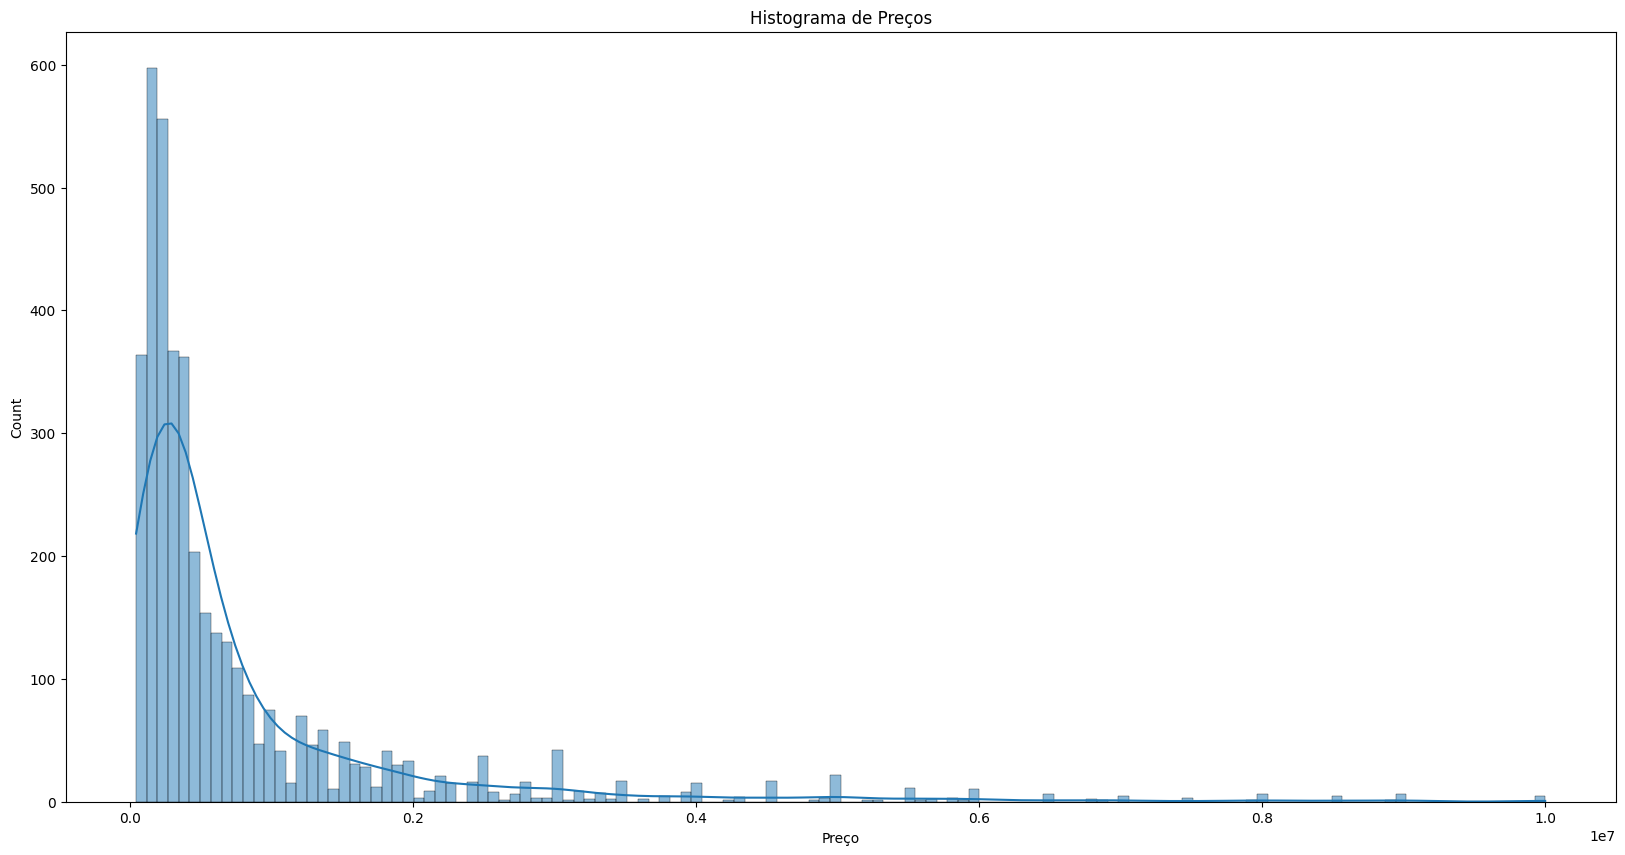

In [37]:
ax = sns.histplot(data = dados_comercial_RJ, x = 'preco', kde = True)
ax.figure.set_size_inches(20,10)
ax.set_title('Histograma de Preços')
ax.set_xlabel('Preço')
ax

## Operação com dados e transformações

As variáveis categóricas precisaram ser transformadas para que possam ser utilizadas no modelo de modo apropriado. Assim o campo que diz se é do tipo casa ou outros, bem como o campo que mostra a zona onde o imóvel se encontra, precisará ser transformado em campos binários destes.

In [38]:
variaveis_categoricas = dados_comercial_RJ.select_dtypes(include=['object']).columns
variaveis_categoricas

Index(['tipo', 'zona'], dtype='object')

In [39]:
df_dummies = pd.get_dummies(dados_comercial_RJ[variaveis_categoricas])
df_dummies = df_dummies.astype(int)
df_dummies.head()

,tipo_Casa,tipo_Outros,zona_Zona Central,zona_Zona Norte,zona_Zona Oeste,zona_Zona Sul
0,0,1,0,1,0,0
1,0,1,0,0,1,0
2,0,1,0,1,0,0
3,0,1,0,1,0,0
4,0,1,1,0,0,0


In [40]:
dados_com_dummies = pd.concat([dados_comercial_RJ.drop(variaveis_categoricas, axis=1), df_dummies], axis=1)
dados_com_dummies.head()

,preco,tax_iptu,tax_condo,quartos,banheiros,suites,garagens,area_usavel,area_total,pisos,unidades_sobre_piso,unidades_piso,tipo_Casa,tipo_Outros,zona_Zona Central,zona_Zona Norte,zona_Zona Oeste,zona_Zona Sul
0,45000.0,346.0,468.0,0,1,0,0,32,32,0,0,3,0,1,0,1,0,0
1,50000.0,211.0,801.0,0,1,0,0,25,25,0,0,2,0,1,0,0,1,0
2,50000.0,0.0,230.0,0,1,0,0,23,23,0,0,0,0,1,0,1,0,0
3,45000.0,0.0,0.0,0,0,0,0,60,60,0,0,0,0,1,0,1,0,0
4,45000.0,0.0,0.0,0,0,0,1,5,5,0,0,0,0,1,1,0,0,0


Devido a assimetria, será necessário realizar transformações nos dados para que possam operar corretamente. Assim aplica-se a transformação logaritmica nos dados, operando todos os dados dos registros com o ln.

In [41]:
from sklearn.preprocessing import FunctionTransformer

transformador = FunctionTransformer(np.log1p, validate = True)
dados_transformados = transformador.transform(dados_com_dummies.select_dtypes(exclude = ['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [42]:
colunas_dados_transformados = dados_com_dummies.select_dtypes(exclude=['object']).columns
df_transformado = pd.concat([dados_com_dummies.select_dtypes(include=['object']),
                             pd.DataFrame(dados_transformados, columns=colunas_dados_transformados)], axis=1)

In [43]:
df_transformado.head()

,preco,tax_iptu,tax_condo,quartos,banheiros,suites,garagens,area_usavel,area_total,pisos,unidades_sobre_piso,unidades_piso,tipo_Casa,tipo_Outros,zona_Zona Central,zona_Zona Norte,zona_Zona Oeste,zona_Zona Sul
0,10.714440,5.849325,6.150603,0.0,0.693147,0.0,0.000000,3.496508,3.496508,0.0,0.0,1.386294,0.0,0.693147,0.000000,0.693147,0.000000,0.0
1,10.819798,5.356586,6.687109,0.0,0.693147,0.0,0.000000,3.258097,3.258097,0.0,0.0,1.098612,0.0,0.693147,0.000000,0.000000,0.693147,0.0
2,10.819798,0.000000,5.442418,0.0,0.693147,0.0,0.000000,3.178054,3.178054,0.0,0.0,0.000000,0.0,0.693147,0.000000,0.693147,0.000000,0.0
3,10.714440,0.000000,0.000000,0.0,0.000000,0.0,0.000000,4.110874,4.110874,0.0,0.0,0.000000,0.0,0.693147,0.000000,0.693147,0.000000,0.0
4,10.714440,0.000000,0.000000,0.0,0.000000,0.0,0.693147,1.791759,1.791759,0.0,0.0,0.000000,0.0,0.693147,0.693147,0.000000,0.000000,0.0


Com esse dataframe transformado, avaliaremos novamente a correlação. Agora nota-se a força da correlação das variáveis que antes eram categóricas.

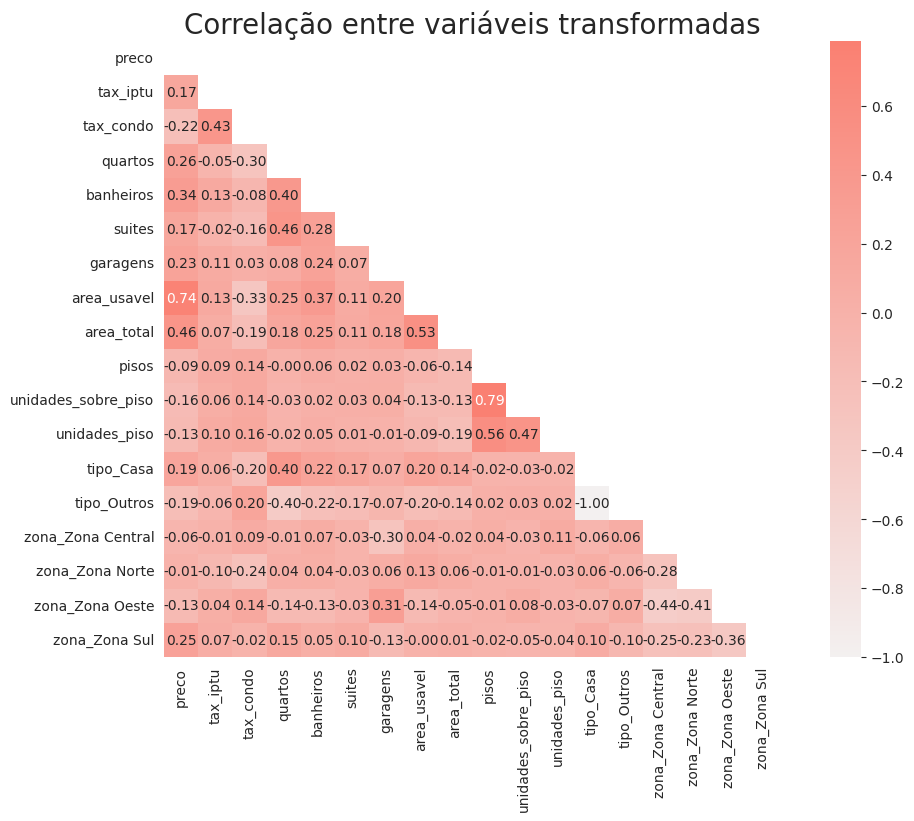

In [44]:
correlacao = df_transformado.corr()
cores = sns.color_palette('light:salmon', as_cmap=True)
mascara = np.zeros_like(correlacao)
mascara[np.triu_indices_from(mascara)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize = (13,8))
  ax = sns.heatmap(correlacao, cmap = cores, mask = mascara, square = True, fmt = '.2f', annot = True)
  ax.set_title('Correlação entre variáveis transformadas', fontsize=20)

Com a distribuição dos dados se assemelhando a uma distribuição normal, fica mais consistente realizar as operações para modelar os dados

<Axes: title={'center': 'Histograma de Preços'}, xlabel='Preço', ylabel='Count'>

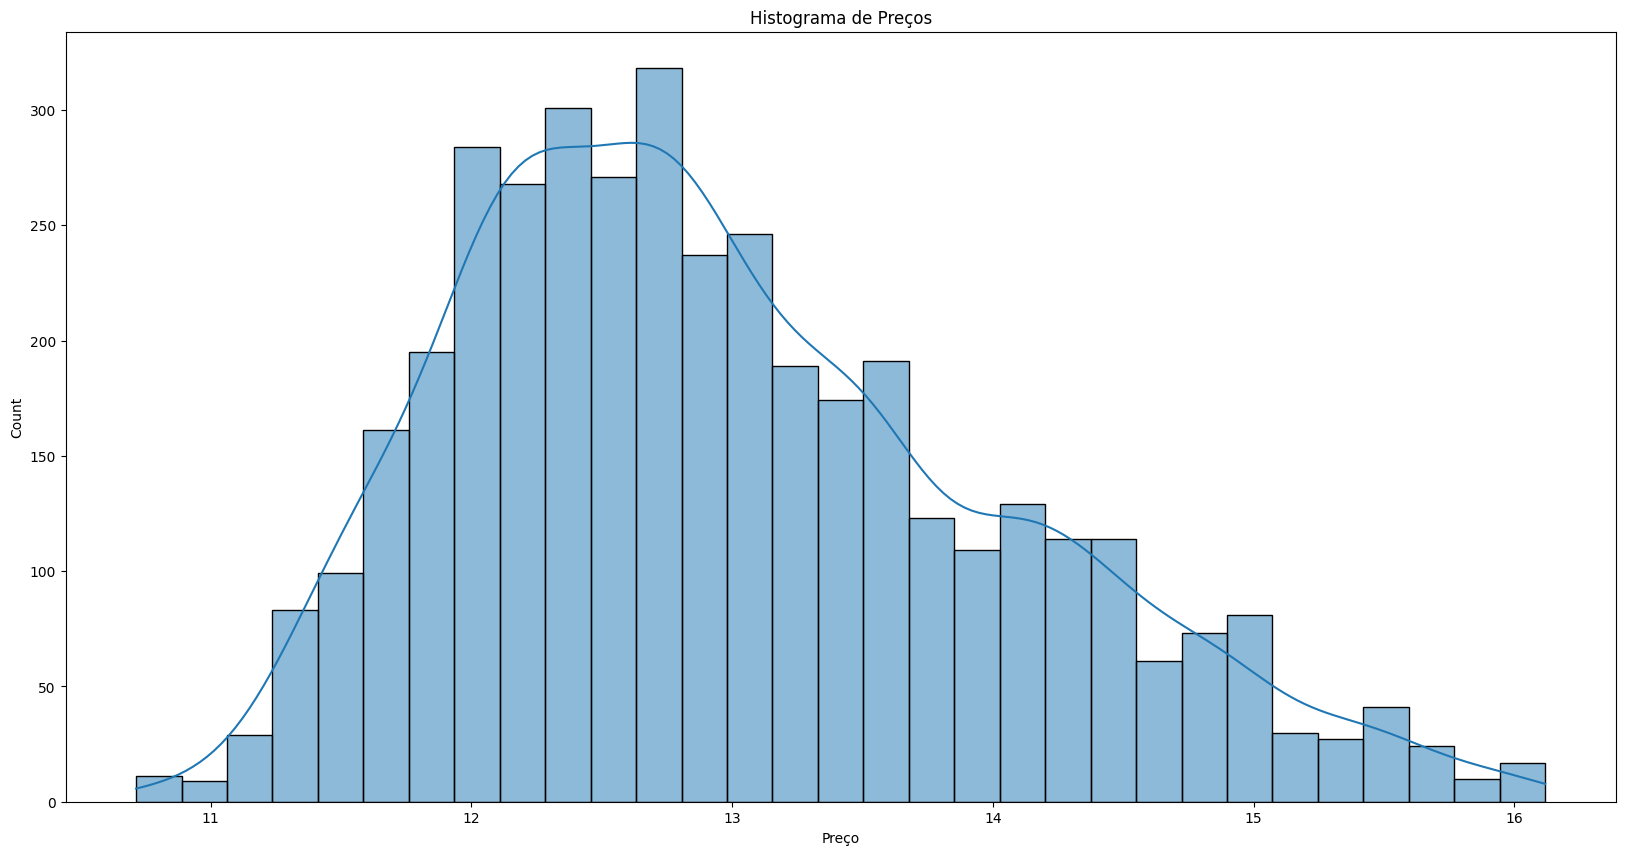

In [45]:
ax = sns.histplot(data = df_transformado, x = 'preco', kde = True)
ax.figure.set_size_inches(20,10)
ax.set_title('Histograma de Preços')
ax.set_xlabel('Preço')
ax

## Elaboração do modelo

### Modelo com Regressão Linear

A modelagem se inicia, definindo os valores randômicos para que seja possível repetir os resultados.

In [46]:
seed = 42
np.random.seed(seed)

Aplica-se a técnica holdout e separa-se o conjunto de dados em treino e teste.

In [47]:
X = df_transformado.drop('preco', axis=1)
y = df_transformado['preco']

In [48]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.3,  random_state = seed)

Instancia-se o modelo LinearRegression, depois os dados de teste são usados no treinamento e então faz-se as previsões.

In [49]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_treino, y_treino)
LR_previsto = LR.predict(X_teste)

Avaliar a qualidade do modelo é fundamental, portanto, usa-se a métrica R² que dá uma medida de quanto os dados se adequam a equação prevista.

In [50]:
from sklearn.metrics import r2_score

LR_r2 = r2_score(y_teste, LR_previsto)
LR_r2

0.6505716746980377

### Modelo de Árvore de Decisão

Outro modelo de regressão utilizado é a Árvore de Decisão para regressão. Utilizaremos este modelo também para comparação.

In [51]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(random_state = seed, max_depth=5)
DTR.fit(X_treino, y_treino)
DTR_previsto = DTR.predict(X_teste)

In [52]:
DTR_r2 = r2_score(y_teste, DTR_previsto)
DTR_r2

0.7209691687985944

### Modelo Floresta Aleatória

Uma vez que a árvore de decisão deu um escore mais satisfatório, utilizaremos um método ensemble, isto é, com modelos trabalhando em conjunto. No caso aplica-se a Floresta Aleatória, que é um exemplo da metodologia bagging, agregando árvores de decisão e encontrando um resultado mais preciso.

In [53]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state = seed, max_depth=5, n_estimators = 10)
RFR.fit(X_treino, y_treino)
RFR_previsto = RFR.predict(X_teste)

In [54]:
RFR_r2 = r2_score(y_teste, RFR_previsto)
RFR_r2

0.7481690859814341

## Otimização dos modelos

Os modelos possuem vários hiperparâmetros que podem ser ajustados para encontrar um modelo melhor para um dado conjunto. Por isso, realizou-se a otimização dos modelos através da exploração aleatória com validação cruzada.

### Otimização da árvore de decisão

Primeiro importa-se o KFold que separará os dados em subconjuntos.

In [55]:
from sklearn.model_selection import KFold

cv = KFold(n_splits = 5, shuffle=True)

Com o cross_val_score é possível realizar a validação cruzada e obter o desempenho médio do estimador.

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
desempenho_DTR_r2 = cross_val_score(
    estimator = DTR,
    X = X_treino,
    y = y_treino,
    scoring = 'r2',
    cv = cv
)

print('Desempenho médio de r2: {}'.format(round(desempenho_DTR_r2.mean(), 3)))

Desempenho médio de r2: 0.695


Um dicionário foi criado contendo valores para alguns dos hiperparâmetros da árvore de decisão.


*   O critério de qualidade pode ser: o erro quadrático ou o erro absoluto;
*   A máxima profundidade refêre-se ao número de novos ramos que vão surigindo;
*   O mínimo de amostra por folhas, assim como o mínimo de amostras para separação é útil para não tornar as folhas específicas demais;
*   O máximo de características é um critério útil para controlar a complexidade do modelo.



In [58]:
from sklearn.model_selection import RandomizedSearchCV

hiperparametros_DTR = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': list(range(20)),
    'min_samples_leaf': list(range(11)),
    'min_samples_split': list(range(11)),
    'max_features': ['sqrt','log2','auto']
}

In [59]:
randomizado_cv_DTR = RandomizedSearchCV(
    DTR,
    hiperparametros_DTR,
    n_iter = 5,
    cv = cv,
    scoring = 'r2',
    n_jobs = -1,
    random_state = seed
)

Depois que a classe foi instanciada será realizado o treinamento e os resultados serão apresentados.

In [60]:
DTR_otimizado = randomizado_cv_DTR.fit(X_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validat

In [61]:
pd.DataFrame(DTR_otimizado.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003196,0.001959,0.000000,0.000000,10,0,sqrt,0,absolute_error,"{'min_samples_split': 10, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,0.022618,0.008383,0.016504,0.008449,2,1,log2,2,squared_error,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.274472,0.301196,0.332861,0.270180,0.283524,0.292447,0.022840,3
2,0.004068,0.004011,0.000000,0.000000,0,6,auto,14,squared_error,"{'min_samples_split': 0, 'min_samples_leaf': 6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,0.869538,0.118951,0.016460,0.009687,9,9,auto,16,absolute_error,"{'min_samples_split': 9, 'min_samples_leaf': 9...",0.691323,0.696853,0.709337,0.650224,0.634023,0.676352,0.029006,1
4,0.036233,0.017139,0.018037,0.009616,10,9,sqrt,14,squared_error,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.700775,0.652636,0.678089,0.602319,0.637871,0.654338,0.033766,2


Como os melhores parâmetros será realizado um modelo otimizado da árvore de decisão.

In [62]:
DTR_otimizado.best_params_

{'min_samples_split': 9,
 'min_samples_leaf': 9,
 'max_features': 'auto',
 'max_depth': 16,
 'criterion': 'absolute_error'}

In [63]:
DTR_otimizado_modelo = DecisionTreeRegressor(criterion='absolute_error' , max_depth=16, max_features='auto',
                                             min_samples_leaf= 9, min_samples_split = 9)
DTR_otimizado_modelo.fit(X_treino, y_treino)
DTR_otimizado_previsto = DTR_otimizado_modelo.predict(X_teste)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [64]:
DTR_otimizado_r2 = r2_score(y_teste, DTR_otimizado_previsto)
DTR_otimizado_r2

0.7167634596846224

Caso seja de interesse pode-se apresentar o modelo como uma imagem com graphviz

In [65]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(DTR_otimizado_modelo, out_file=None, filled=True)
grafico = graphviz.Source(dot_data)

Além disso, a imagem da árvore pode ser salva.

In [66]:
from sklearn import tree

plt.figure(figsize=(200,100))
tree.plot_tree(DTR_otimizado_modelo, filled=True, fontsize=14)
plt.savefig('Modelo de Regressão')
plt.close()

### Otimização da Floresta Aleatória

Como a floresta aleatória já tinha um escore melhor, prossegue-se com a otimização dela

In [67]:
desempenho_RFR_r2 = cross_val_score(
    estimator = RFR,
    X = X_treino,
    y = y_treino,
    scoring = 'r2',
    cv = cv)

print('Desempenho médio de r2: {}'.format(round(desempenho_RFR_r2.mean(), 3)))

Desempenho médio de r2: 0.723


In [68]:
hiperparametros_RFR = {
    'n_estimators': list(range(10,30)),
    'max_depth': list(range(5,30,5)),
    'min_samples_split': list(range(10)),
    'min_samples_leaf': list(range(10))
}

In [69]:
randomizado_cv_RFR = RandomizedSearchCV(
    RFR,
    hiperparametros_RFR,
    n_iter = 5,
    cv = cv,
    scoring = 'r2',
    n_jobs = -1,
    random_state = seed
)

In [70]:
RFR_otimizado = randomizado_cv_RFR.fit(X_treino, y_treino)

In [71]:
RFR_otimizado.best_params_

{'n_estimators': 21,
 'min_samples_split': 9,
 'min_samples_leaf': 5,
 'max_depth': 15}

In [72]:
RFR_otimizado_modelo = RandomForestRegressor(n_estimators = 21, max_depth=15, min_samples_leaf= 5, min_samples_split = 9)
RFR_otimizado_modelo.fit(X_treino, y_treino)
RFR_otimizado_previsto = RFR_otimizado_modelo.predict(X_teste)

In [73]:
RFR_otimizado_r2 = r2_score(y_teste, RFR_otimizado_previsto)
RFR_otimizado_r2

0.7761246034010345

## Escolha do Melhor modelo

Uma vez que a otimização foi realizada, os modelos são apresentados abaixo com seus escores. Diante dos resultados é escolhida a floresta aleatória otimizada.

In [74]:
print(f"LinearRegression: {round(LR_r2,3)}")
print("*"*30)
print("Cross Validation")
print("="*30)
print(f"Árvore de Decisão: {round(desempenho_DTR_r2.mean(), 3)}")
print(f"Floresta Aleatória: {round(desempenho_RFR_r2.mean(), 3)}")
print("*"*30)
print('Random Search')
print("="*30)
print(f"Árvore de Decisão: {round(r2_score(y_teste, DTR_otimizado_previsto),3)}")
print(f"Floresta Aleatória: {round(r2_score(y_teste, RFR_otimizado_previsto),3)}")

LinearRegression: 0.651
******************************
Cross Validation
Árvore de Decisão: 0.695
Floresta Aleatória: 0.723
******************************
Random Search
Árvore de Decisão: 0.717
Floresta Aleatória: 0.776


Neste gráfico pode-se visualizar como está o resultado da floresta aleatória e quanto bem a reta se adequa aos dados.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


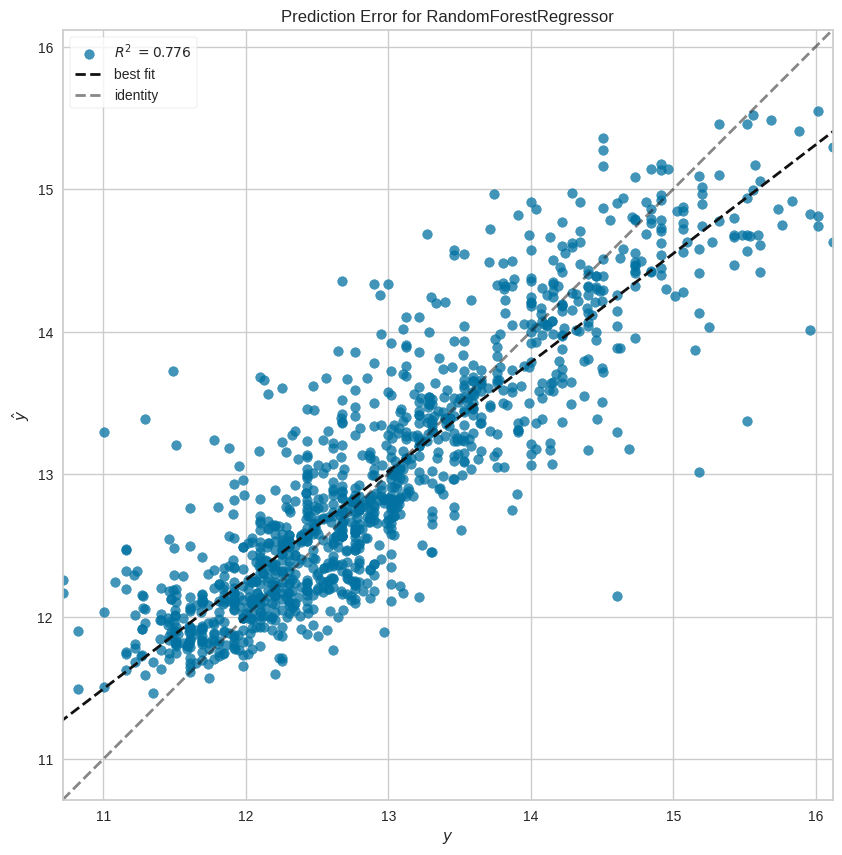

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [75]:
from yellowbrick.regressor import PredictionError

fig,ax = plt.subplots(figsize = (10,10))
pev = PredictionError(RFR_otimizado_modelo)
pev.fit(X_treino, y_treino)
pev.score(X_teste, y_teste)
pev.poof()

# Teste do modelo

Com o modelo treinado pode-se fazer predições baseadas em informações de um imóvel que um cliente deseja saber o preço.

## Exemplo de cliente

In [76]:
cliente_fulano = pd.DataFrame({'tax_iptu':[770],
                              'tax_condo':[740],
                              'quartos':[0],
                              'banheiros':[1],
                              'suites':[0],
                              'garagens':[1],
                              'area_usavel':[60],
                              'area_total':[60],
                              'pisos':[4],
                              'unidades_sobre_piso':[25],
                              'unidades_piso':[2],
                              'tipo_Casa':[0],
                              'tipo_Outros':[1],
                              'zona_Zona Central':[0],
                              'zona_Zona Norte':[0],
                              'zona_Zona Oeste':[1],
                              'zona_Zona Sul':[0]})
cliente_fulano

,tax_iptu,tax_condo,quartos,banheiros,suites,garagens,area_usavel,area_total,pisos,unidades_sobre_piso,unidades_piso,tipo_Casa,tipo_Outros,zona_Zona Central,zona_Zona Norte,zona_Zona Oeste,zona_Zona Sul
0,770,740,0,1,0,1,60,60,4,25,2,0,1,0,0,1,0


In [77]:
dados_cliente = np.log1p(cliente_fulano)
dados_cliente

,tax_iptu,tax_condo,quartos,banheiros,suites,garagens,area_usavel,area_total,pisos,unidades_sobre_piso,unidades_piso,tipo_Casa,tipo_Outros,zona_Zona Central,zona_Zona Norte,zona_Zona Oeste,zona_Zona Sul
0,6.647688,6.608001,0.0,0.693147,0.0,0.693147,4.110874,4.110874,1.609438,3.258097,1.098612,0.0,0.693147,0.0,0.0,0.693147,0.0


In [78]:
predicao_cliente_fulano = RFR_otimizado_modelo.predict(dados_cliente)
print(f" O imóvel do Fulano com essas características custaria: {np.expm1(predicao_cliente_fulano).round(2)}")

 O imóvel do Fulano com essas características custaria: [352756.51]


## Exportação do modelo

Para finalizar, vamos exportar o modelo obtido, para que possa ser utilizado em outro notebook do colab.

In [79]:
import pickle
output = open('modelo', 'wb')
pickle.dump(RFR_otimizado_modelo, output)
output.close()